
**NAMA = Raden Rian Girianom**    
**URL Dataset = [Click](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/data)**       
**URL Deploy = [Click](https://huggingface.co/spaces/rianrg/M2-Fr-class)**

**Problem statement :**       
Peningkatan tren kasus fraud pada industri keuangan pasca pandemi Covid19, khususnya financial insurance terdapat temuan beberapa tipe fraud salah satunya adalah customer fraud yang menyumbang hampir 44 % penyebab kerugian di industri keuangan dan pelaku external terbanyak menyebabkan kerugian adalah 26 % berasal dari customer, 24 % Serangan hacker dan sisanya pihak ketiga (vendor) 19%. Penggunaan strategi, teknologi detection fraud dan KYC sangat penting untuk mengurangi potensi kerugian perusahaan insurance. ([Berdasarkan riset dari PWC Global economic crime and fraud survey tahun 2022](https://www.pwc.com/gx/en/services/forensics/economic-crime-survey.html))

**Objective :**        
Berdasarkan problem statement diatas saya akan membuat model detection fraud apakah claim insurance dinyatakan credibel atau fraud menggunakan Machine learning dengan memilih salah satu algoritma terbaik klasifikasi decisiontree, randomforest, svc, atau logreg berdasrkan nilai cross validation dengan metrik f1_score (rata-rata false negative dan positif).     

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

# Import featuring engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from phik import phik_matrix

#import model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

### **Data Loading**

In [2]:
# Menampilkan 5 data awal

df1 = pd.read_csv('fraud_oracle.csv')
df1.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
# Menampilkan 5 data akhir

df1.tail(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [4]:
# Cek datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
# Rename Column untuk mempermudah proses analisis selanjutnya
df1.rename({'FraudFound_P': 'isfraud',
            'Sex': 'Gender',
            'Make' : 'Brand',
            'PolicyType' : 'Type_Polis',
            'PolicyNumber' : 'No_Polis',
            'BasePolicy' : 'TypeInsurance'
            }, axis=1, inplace=True)

In [6]:
# prin semua hasil unique value masing-masing kolom
for col in df1:
    print(col,":\n",df1[col].unique(),'\n')

Month :
 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

WeekOfMonth :
 [5 3 2 4 1] 

DayOfWeek :
 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Brand :
 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea :
 ['Urban' 'Rural'] 

DayOfWeekClaimed :
 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed :
 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

WeekOfMonthClaimed :
 [1 4 2 3 5] 

Gender :
 ['Female' 'Male'] 

MaritalStatus :
 ['Single' 'Married' 'Widow' 'Divorced'] 

Age :
 [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault :
 ['Policy Holder' 'Third Party'] 

Type_Pol

**INSIGHT**     
-- Data diatas ada 15420 row dan 33 kolom        
-- Tidak ditemukan missing value, Sehingga kita tidak perlu handling missing value      
-- Ditemukan nilai yang tidak jelas di kolom `Age`:0, `DayOfWeekClaimed`:0, `MonthClaimed` :0

Selanjutnya akan kita cek duplicated data dan handle nilai yang tidak jelas tadi

In [7]:
# Cek terlebih dahulu duplicated value
duplicated = df1[df1.duplicated()]

print("Duplicated Data:")
print(duplicated)

Duplicated Data:
Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, Brand, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Gender, MaritalStatus, Age, Fault, Type_Polis, VehicleCategory, VehiclePrice, isfraud, No_Polis, RepNumber, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, TypeInsurance]
Index: []

[0 rows x 33 columns]


Tidak ditemukan adanya duplicated value. Selanjutnya handling value yang tidak jelas tadi

In [8]:
age1 = df1.Age.unique()
mc1 = df1.MonthClaimed.unique()
doc = df1.DayOfWeekClaimed.unique()

print(age1)
print()
print(mc1)
print()
print(doc)

[21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]

['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']


ada 3 kolom yang mengandung value yang aneh bisa berpengaruh terhadap analisis selanjutnya sehingga untuk `DayOfWeekClaimed` dan `MonthClaimed` tidak diketahui asal usul nilai 0 sehingga harus didrop, Sedangkan untuk `Age` bisa menggunakan imputasi mean/median

In [9]:
df1 = df1[df1['MonthClaimed'] != '0']
df1 = df1[df1['DayOfWeekClaimed'] != '0']

In [10]:
# Cek setiap kolom
df1['MonthClaimed'].value_counts()

MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
Name: count, dtype: int64

In [11]:
df1['DayOfWeekClaimed'].value_counts()

DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: count, dtype: int64

In [12]:
# Mengganti nilai age berisi 0 dengan median
median = df1[df1['Age'] != 0]['Age'].median()
df1['Age'] = df1['Age'].replace(0, median)

In [13]:
df1.Age.unique()

array([21, 34, 47, 65, 27, 20, 36, 39, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48, 64,
       33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69, 67,
       19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66],
      dtype=int64)

In [14]:
# cek informasi
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15419 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15419 non-null  object
 1   WeekOfMonth           15419 non-null  int64 
 2   DayOfWeek             15419 non-null  object
 3   Brand                 15419 non-null  object
 4   AccidentArea          15419 non-null  object
 5   DayOfWeekClaimed      15419 non-null  object
 6   MonthClaimed          15419 non-null  object
 7   WeekOfMonthClaimed    15419 non-null  int64 
 8   Gender                15419 non-null  object
 9   MaritalStatus         15419 non-null  object
 10  Age                   15419 non-null  int64 
 11  Fault                 15419 non-null  object
 12  Type_Polis            15419 non-null  object
 13  VehicleCategory       15419 non-null  object
 14  VehiclePrice          15419 non-null  object
 15  isfraud               15419 non-null  int

Hasil data diatas sudah bersih hanya berkurang 2 data dan tidak terlalu banyak dari 15419

Kemudian cek seluruh isi value dari setiap column

In [15]:
for column in df1.columns:
    print("Column:", column)
    print(df1[column].value_counts())
    print()

Column: Month
Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1256
Sep    1240
Nov    1201
Aug    1127
Name: count, dtype: int64

Column: WeekOfMonth
WeekOfMonth
3    3640
2    3557
4    3398
1    3187
5    1637
Name: count, dtype: int64

Column: DayOfWeek
DayOfWeek
Monday       2615
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: count, dtype: int64

Column: Brand
Brand
Pontiac      3837
Toyota       3121
Honda        2800
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64

Column: AccidentArea
AccidentArea
Urban    13822
Rural     1597
Name: count, dtype: int64

Column: DayOfWeekClaimed
DayOfWeekClaim

Dari pengecekan value setiap column diatas terdapat nilai yang sangat sedikit dan akan menyulitkan untuk dilakukan analisis mendalam yaitu :        	
Column: Type_Polis, dengan value Sport - Liability = 1
Column: Brand, dengan value Lexus = 1

Sehingga untuk column type_polis dengan value Sport - Liability = 1 akan di drop dan         
Column: Brand, dengan value Lexus = 1 akan dikategorikan sebagai Others bersama dengan value lain dibawah 10

In [16]:
# Group Other di column brand
Others1 = ['Jaguar', 'Porche', 'Mecedes', 'Ferrari', 'Lexus']
df1['Brand'].replace(Others1, 'Other', inplace=True)

print(df1['Brand'].value_counts())

Brand
Pontiac      3837
Toyota       3121
Honda        2800
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
Other          18
BMW            15
Name: count, dtype: int64


In [17]:
# Drop value Sport - Liability = 1 untuk kolom Type_polis
df1 = df1[~((df1['Type_Polis'] == 'Sport - Liability') & (df1['Type_Polis'].value_counts()['Sport - Liability'] == 1))]

df1.Type_Polis.value_counts()

Type_Polis
Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4086
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Name: count, dtype: int64

In [18]:
# Membuat copy dari df1 yang sudah dilakukan pembersihan untuk selanjutnya digunakan sebagai EDA
df2 = df1.copy()

### **Exploratory Data Analysis (EDA)**

In [19]:
df2.head(5)

,Month,WeekOfMonth,DayOfWeek,Brand,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Gender,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,TypeInsurance
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision


In [20]:
df2

,Month,WeekOfMonth,DayOfWeek,Brand,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Gender,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,TypeInsurance
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


#### Bulan apa ditemukan tingkat Fraud tertinggi?

In [21]:
# Fraud 1 = Yes, 0 = tidak. Sehingga kita gunakan filter 1 untuk menemukan fraud
fraud_df = df2[df2['isfraud'] == 1]

# Group by berdasarkan bulan dan fraudFound_P
fraud_by_month = fraud_df.groupby('Month')['isfraud'].count().reset_index()

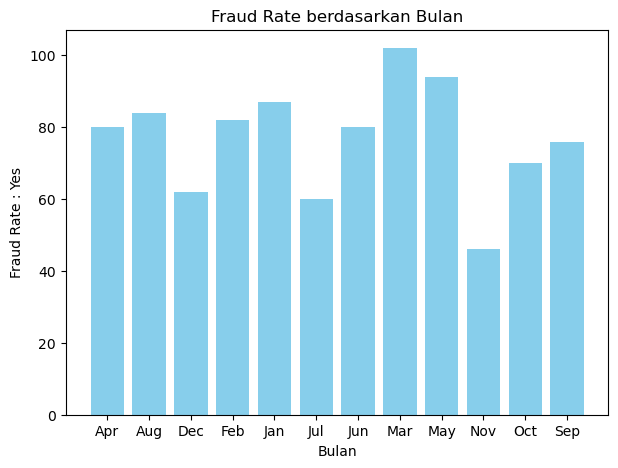

In [22]:
# Visualisasi berdasarkan data diatas
plt.figure(figsize=(7, 5))
plt.bar(fraud_by_month['Month'], fraud_by_month['isfraud'], color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Fraud Rate : Yes')
plt.title('Fraud Rate berdasarkan Bulan')
plt.show()

Berdasarkan data diatas ditemukan tingkat fraud atau penyimpangan untuk mendapatkan claim asuransi mobil terbanyak di bulan Maret.

#### Persentase claim terdeteksi fraud dengan keseluruhan data

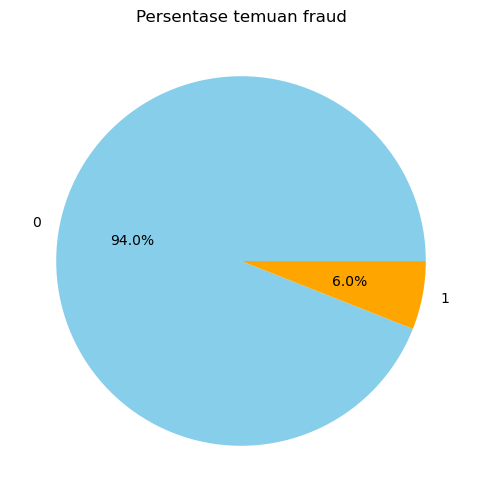

isfraud
0    94.013491
1     5.986509
Name: proportion, dtype: float64


In [23]:
# Cek persentase claim terdeteksi fraud
percentage_distribution = df2['isfraud'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Persentase temuan fraud')
plt.show()

print(percentage_distribution)

Hampir 94 % dinyatakan claim normal dan hanya 5,9 % dinyatakan claim yang menyimpang (fraud), selanjutnya akan dianalsis mengenai 6 % claim yang menyimpang (fraud).

#### Area mana yang mempunyai tingkat fraud tertinggi pada bulan Maret?

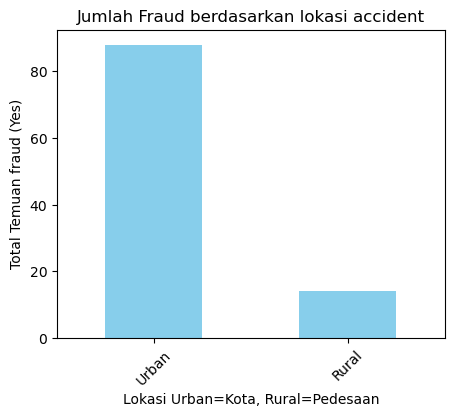

In [24]:
# Berdasarkan bulan tertinggi ditemukan kasus fraud adalah Maret
# Selanjutnya adalah pada bulan maret area mana yang mendominasi tingkat fraud dalam claim asuransi

maret_fraud = df2[(df2['Month'] == 'Mar') & (df2['isfraud'] == 1)]

# Count the number of fraud cases by accident area
fraud_by_area = maret_fraud['AccidentArea'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(5, 4))
fraud_by_area.plot(kind='bar', color='skyblue')
plt.xlabel('Lokasi Urban=Kota, Rural=Pedesaan')
plt.ylabel('Total Temuan fraud (Yes)')
plt.title('Jumlah Fraud berdasarkan lokasi accident')
plt.xticks(rotation=45)
plt.show()

Insight =       
-- Tingkat penyimpangan untuk claim asuransi (fraud) tertinggi pada bulan maret dan berasal dari area perkotaan (urban)

#### Berapa tipe agen asuransi terlibat pengurusan claim yang terindikasi fraud?

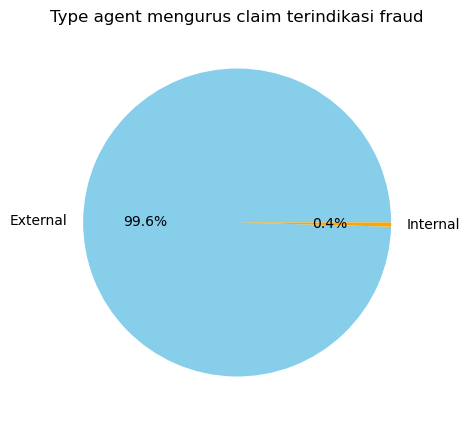

Type agent mengurus claim terindikasi fraud:
AgentType
External    919
Internal      4
Name: count, dtype: int64


In [25]:
# Menentukan kateegori fraud=1 yang artinya Yes, terlebih dahulu
fraud_data = df2[df2['isfraud'] == 1]

# Menentukan agent type yang terdeteksi / terlibat dalam fraud berdasarkan data
agent_type = fraud_data['AgentType'].value_counts()

# Plot visualisasi
plt.figure(figsize=(5, 5))
plt.pie(agent_type, labels=agent_type.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Type agent mengurus claim terindikasi fraud')
plt.show()

print("Type agent mengurus claim terindikasi fraud:")
print(agent_type)

Dari data diatas menunjukan banyaknya claim yang terindikasi fraud terbanyak berasal dari type agent External dengan jumlah 919 agen dan agen asuransi internal 4 orang yang mana. apabila dipersentasekan dari total temuan fraud adalah 99,6 % agen External dan 0,4 agen internal

#### Apakah marital status mempengaruhi probabilitas terjadinya fraud claim?

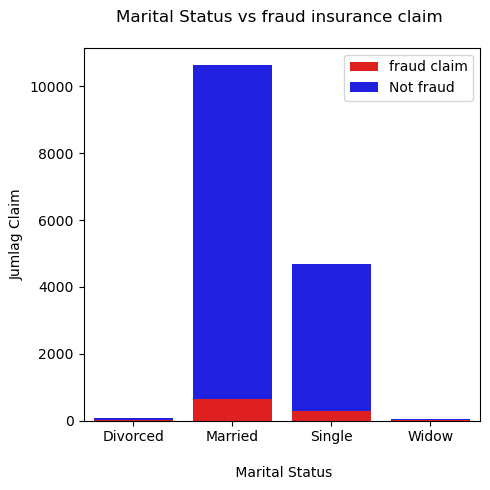

In [26]:
# Apakah marital status bisa menjadi penyebab terjadinya fraud claim?
marital_status_count = df2.groupby(['MaritalStatus', 'isfraud']).size().unstack()

plt.figure(figsize=(5, 5))
sns.barplot(x=marital_status_count.index, y=marital_status_count[1], color='red', label='fraud claim')
sns.barplot(x=marital_status_count.index, y=marital_status_count[0], color='blue', bottom=marital_status_count[1], label='Not fraud')

plt.xlabel('\n Marital Status')
plt.ylabel('Jumlag Claim')
plt.title('Marital Status vs fraud insurance claim \n')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Data diatas menunjukan bahwa status marital married ternyata berpotensi dengan claim yang berindikasi fraud

In [27]:
# Copy dataframe
df3 = df2.copy()

### **Feature Engineering**

#### Mengganti String dengan angka untuk beberapa kolom Waktu

In [28]:
# Mengganti value string kolom bulan dengan angka
df3[['Month']] = df3[['Month']].replace( {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' :3,
    'Apr' : 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug' : 8,
    'Sep': 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
    })

# Mengganti value string kolom week dengan angka
df3[['DayOfWeek']] = df3[['DayOfWeek']].replace( {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday' : 7
    })

# Mengganti value string kolom week dengan angka
df3[['DayOfWeekClaimed']] = df3[['DayOfWeekClaimed']].replace( {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday' : 7
    })

df3[['MonthClaimed']] = df3[['MonthClaimed']].replace( {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' :3,
    'Apr' : 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug' : 8,
    'Sep': 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
    })

Setelah dilakukan pengecekan lebih lanjut untuk deductible bukanlah sebuah numerical data maka akan diubah tipedata dari numeric menjadi kategorical

In [29]:
# Mengubah Deductible column sebagai data categorical
df3['Deductible'] = df3['Deductible'].astype('category')

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15418 entries, 1 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15418 non-null  int64   
 1   WeekOfMonth           15418 non-null  int64   
 2   DayOfWeek             15418 non-null  int64   
 3   Brand                 15418 non-null  object  
 4   AccidentArea          15418 non-null  object  
 5   DayOfWeekClaimed      15418 non-null  int64   
 6   MonthClaimed          15418 non-null  int64   
 7   WeekOfMonthClaimed    15418 non-null  int64   
 8   Gender                15418 non-null  object  
 9   MaritalStatus         15418 non-null  object  
 10  Age                   15418 non-null  int64   
 11  Fault                 15418 non-null  object  
 12  Type_Polis            15418 non-null  object  
 13  VehicleCategory       15418 non-null  object  
 14  VehiclePrice          15418 non-null  object  
 15  isfraud

#### Split Train-Test Data

In [31]:
# menentukan y target dan memisahkan x dan y
X = df3.drop('isfraud', axis=1)
y = df3['isfraud']
X.head()

,Month,WeekOfMonth,DayOfWeek,Brand,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Gender,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,TypeInsurance
1,1,3,3,Honda,Urban,1,1,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,5,Honda,Urban,4,11,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,1,Honda,Urban,2,2,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,10,4,5,Honda,Urban,3,11,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision


In [32]:
# Split Train-Set dan Test-Set 0.2 (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

print('X Train Size :', X_train.shape)
print('X Test Size :', X_test.shape)
print('y Train Size :', y_train.shape)
print('y Test Size :', y_test.shape)

X Train Size : (12334, 32)
X Test Size : (3084, 32)
y Train Size : (12334,)
y Test Size : (3084,)


#### Outlier Checking dan Handling

In [33]:
numeric_col = X_train.select_dtypes(include='number')
numeric_list= numeric_col.columns.tolist()

print(numeric_list)

['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Age', 'No_Polis', 'RepNumber', 'DriverRating', 'Year']


In [34]:
#Cek skewness
print('Distribusi fitur Month  : ', X_train['Month'].skew())
print('Distribusi fitur WeekOfMonth  : ', X_train['WeekOfMonth'].skew())
print('Distribusi fitur DayOfWeek  : ', X_train['DayOfWeek'].skew())
print('Distribusi fitur DayOfWeekClaimed  : ', X_train['DayOfWeekClaimed'].skew())
print('Distribusi fitur MonthClaimed  : ', X_train['MonthClaimed'].skew())
print('Distribusi fitur WeekOfMonthClaimed  : ', X_train['WeekOfMonthClaimed'].skew())
print('Distribusi fitur Age  : ', X_train['Age'].skew())
print('Distribusi fitur No_Polis  : ', X_train['No_Polis'].skew())
print('Distribusi fitur RepNumber  : ', X_train['RepNumber'].skew())
print('Distribusi fitur DriverRating  : ', X_train['DriverRating'].skew())
print('Distribusi fitur Year  : ', X_train['Year'].skew())

Distribusi fitur Month  :  0.05071609784984338
Distribusi fitur WeekOfMonth  :  0.10624652440467346
Distribusi fitur DayOfWeek  :  0.0731375874792794
Distribusi fitur DayOfWeekClaimed  :  0.2756263893427169
Distribusi fitur MonthClaimed  :  0.04547057108739381
Distribusi fitur WeekOfMonthClaimed  :  0.16107410354105672
Distribusi fitur Age  :  0.7418982359203872
Distribusi fitur No_Polis  :  0.004962914597066491
Distribusi fitur RepNumber  :  0.0027842124643234836
Distribusi fitur DriverRating  :  0.0028644247180143268
Distribusi fitur Year  :  0.24935042578271874


Berdasarkan pengecekan distribusi diatas yang tergolong normal -0.5-0.5 adalah fitur       
`Month`, `WeekOfMonth`, `DayOfWeek`, `DayOfWeekClaimed`, `MonthClaimed`, `WeekOfMonthClaimed`, `Age`, `No_Polis`, `RepNumber`, `DriverRating`, `Year`

Skewness diatas -0.5-0.5 adalah skew yaitu `Age`

Selanjutnya akan dilakukan cek dan normalisasi nilai untuk fitur distribusi normal menggunakan z-score

In [35]:
# Untuk data distribusi normal memakai Z-Score
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

column_check = ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 
                    'MonthClaimed', 'WeekOfMonthClaimed', 'No_Polis', 
                    'RepNumber', 'DriverRating', 'Year']

# Mencari boundary untuk menentukan outlier
for column in column_check:
    upper_boundary, lower_boundary = find_normal_boundaries(X_train, column)
    outlier = X_train[column][(X_train[column] < lower_boundary) | (X_train[column]>upper_boundary)]
    no_outliers = X_train[column][(X_train[column] >= lower_boundary) & (X_train[column] <= upper_boundary)]
    percentage_outliers = len(outlier) * 100 / len(X_train[column])
    jumlah_outliers = len(outlier)

    print(f"Column: {column}")
    print(f"Upper boundary: {upper_boundary}")
    print(f"Lower boundary: {lower_boundary}")
    print(f"Jumlah Outliers: {jumlah_outliers}")
    print(f"Persentase outliers: {percentage_outliers:.2f}%")
    print()

Column: Month
Upper boundary: 16.790919900631586
Lower boundary: -4.011610674103289
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: WeekOfMonth
Upper boundary: 6.637986590255422
Lower boundary: -1.0542343606462117
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: DayOfWeek
Upper boundary: 9.744092635307739
Lower boundary: -2.1138023807269057
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: DayOfWeekClaimed
Upper boundary: 7.167611837562863
Lower boundary: -1.5319705208772771
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: MonthClaimed
Upper boundary: 16.739476177128495
Lower boundary: -4.01011019691121
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: WeekOfMonthClaimed
Upper boundary: 6.472268385192511
Lower boundary: -1.0811543913543407
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: No_Polis
Upper boundary: 21031.248542818255
Lower boundary: -5622.393507955274
Jumlah Outliers: 0
Persentase outliers: 0.00%

Column: RepNumber
Upper boundary: 22.293

Hasilnya dari data numerikal diatas tidak ditemukan adanya outlier untuk data dengan normal distribusi.

Selanjutnya untuk distribusi skew yaitu `Age` akan dilakukan normalisasi outlier methode IQR *1.5

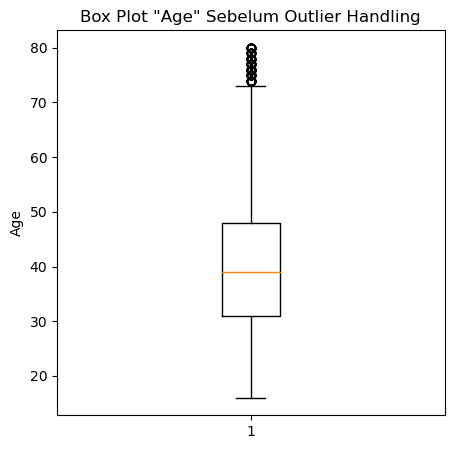

In [36]:
# visualisasi boxplot outlier Age
plt.figure(figsize=(5, 5))
plt.boxplot(X_train['Age'])
plt.title('Box Plot "Age" Sebelum Outlier Handling')
plt.ylabel('Age')
plt.show()

In [37]:
# Cek Outlier dengan IQR 1.5
# Outlier checking menggunakan IQR Tukey rule 1.5 Karena data skew untuk kolom Age
Q1_age = X_train['Age'].quantile(0.25)
Q3_age = X_train['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age
outliers_age = X_train[(X_train['Age'] < lower_age) | (X_train['Age'] > upper_age)]
persentase_outliers_age = (len(outliers_age) / len(X_train)) * 100

print("Jumlah Outlier Age :", len(outliers_age))
print("Persentase Outlier Age: {:.2f}%".format(persentase_outliers_age))
print()

Jumlah Outlier Age : 185
Persentase Outlier Age: 1.50%



Hasilnya ditemukan adanya outlier untuk data distribusi skew `Age` sebanyak 183 atau secara keseluruhan 1.48 %      
Selanjutnya akan dilakukan normalisasi outlier methode trimming karena persentase outlier dibawah 5 %

In [38]:
# Opsi 3
X_train_trim = X_train[(X_train['Age'] >= lower_age) & (X_train['Age'] <= upper_age)]
y_train_trim = y_train.loc[X_train_trim.index]

print("Before trimming:")
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)
print()

print("After trimming:")
print("X_train shape (trim):", X_train_trim.shape)
print("Y_train shape (trim):", y_train_trim.shape)

Before trimming:
X_train shape: (12334, 32)
Y_train shape: (12334,)

After trimming:
X_train shape (trim): (12149, 32)
Y_train shape (trim): (12149,)


Cek kembali nilai outlier untuk kolom age

Jumlah Outlier Age setelah handling : 0
Persentase Outlier Age setelah handling : 0.00%



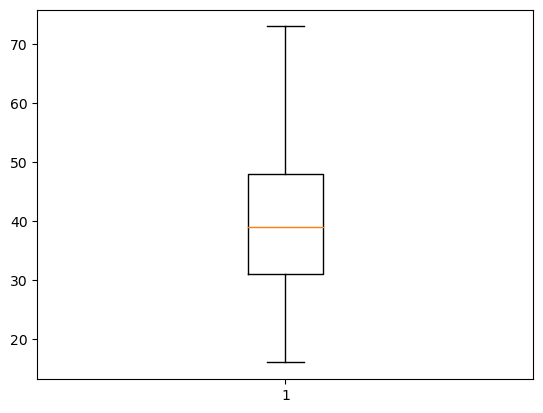

In [39]:
plt.boxplot(X_train_trim['Age'])

outliers_age1 = X_train_trim[(X_train_trim['Age'] < lower_age) | (X_train_trim['Age'] > upper_age)]
persentase_outliers_age1 = (len(outliers_age1) / len(X_train_trim)) * 100

print("Jumlah Outlier Age setelah handling :", len(outliers_age1))
print("Persentase Outlier Age setelah handling : {:.2f}%".format(persentase_outliers_age1))
print()

Hasilnya data di kolom age sudah dinormalisasi dan tidak terdapat outlier.

In [40]:
# Print X_train and y_train sebelum dan sesudah trimming
print('Data size of X_train before trimming:', X_train.shape)
print('Data size of y_train before trimming:', y_train.shape)
print('Data size of X_train after trimming :', X_train_trim.shape)
print('Data size of y_train after trimming :', y_train_trim.shape)

Data size of X_train before trimming: (12334, 32)
Data size of y_train before trimming: (12334,)
Data size of X_train after trimming : (12149, 32)
Data size of y_train after trimming : (12149,)


Setelah dilakukan pengecekan outlier untuk data numerical diatas ternyata data X_train menjadi berkurang karena dilakukan trim tetapi tidak terlalu banyak

#### Missing Value Checking and Handling

In [41]:
X_train_trim.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Brand                   0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Gender                  0
MaritalStatus           0
Age                     0
Fault                   0
Type_Polis              0
VehicleCategory         0
VehiclePrice            0
No_Polis                0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
TypeInsurance           0
dtype: int64

In [42]:
X_test.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Brand                   0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Gender                  0
MaritalStatus           0
Age                     0
Fault                   0
Type_Polis              0
VehicleCategory         0
VehiclePrice            0
No_Polis                0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
TypeInsurance           0
dtype: int64

In [43]:
y_test.isnull().sum()

0

In [44]:
y_train_trim.isnull().sum()

0

In [45]:
# Missing value checking and handling di y_train dan drop jika ada menggunakan dropna
Missingvalue_y_train = y_train_trim[y_train_trim.isnull()].index
X_train_cleaned = X_train_trim.drop(Missingvalue_y_train)
y_train_cleaned = y_train_trim.dropna()

# Missing value checking and handling di y_test dan drop jika ada menggunakan dropna
Missingvalue_y_test = y_test[y_test.isnull()].index
X_test_cleaned = X_test.drop(Missingvalue_y_test)
y_test_cleaned = y_test.dropna()

# Print info and shape
print('X Train Size:', X_train_cleaned.shape)
print('X Test Size:', X_test_cleaned.shape)
print('y Train Size:', y_train_cleaned.shape)
print('y Test Size:', y_test_cleaned.shape)

X Train Size: (12149, 32)
X Test Size: (3084, 32)
y Train Size: (12149,)
y Test Size: (3084,)


Tidak ditemukan missing value (0) maka selanjutnya langsung ke fitur selection

#### Feature Selection

In [46]:
# Menggabungkan data (Concatenate)
train_new = pd.concat([X_train_cleaned, y_train_cleaned], axis = 1)
test_new = pd.concat([X_test_cleaned, y_test_cleaned], axis = 1)

print(train_new.shape)
print(test_new.shape)

(12149, 33)
(3084, 33)


In [47]:
train_new.head(5)

,Month,WeekOfMonth,DayOfWeek,Brand,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Gender,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,TypeInsurance,isfraud
5247,9,4,4,Pontiac,Urban,2,9,3,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,All Perils,0
7567,10,5,6,Pontiac,Urban,3,11,1,Female,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1995,All Perils,1
8988,3,3,7,Mazda,Urban,3,3,4,Male,Married,...,41 to 50,No,No,External,1 to 2,4 to 8 years,2 vehicles,1995,All Perils,0
13049,7,1,2,Mazda,Urban,3,7,1,Male,Single,...,51 to 65,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,0
3211,5,3,6,Pontiac,Urban,1,5,4,Male,Married,...,41 to 50,No,No,External,more than 5,no change,1 vehicle,1994,Liability,0


In [48]:
test_new.tail(5)

,Month,WeekOfMonth,DayOfWeek,Brand,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Gender,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,TypeInsurance,isfraud
14402,2,2,7,Pontiac,Urban,1,2,3,Male,Married,...,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils,0
10554,3,5,1,Toyota,Urban,3,4,1,Male,Married,...,31 to 35,No,No,External,none,no change,1 vehicle,1995,Collision,0
7288,4,1,1,Toyota,Urban,1,4,1,Male,Married,...,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Liability,0
7823,11,2,6,Pontiac,Urban,4,12,3,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1995,Liability,0
14121,3,5,1,Pontiac,Urban,1,4,1,Male,Married,...,over 65,No,No,External,none,no change,1 vehicle,1996,Collision,0


In [49]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12149 entries, 5247 to 4919
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 12149 non-null  int64   
 1   WeekOfMonth           12149 non-null  int64   
 2   DayOfWeek             12149 non-null  int64   
 3   Brand                 12149 non-null  object  
 4   AccidentArea          12149 non-null  object  
 5   DayOfWeekClaimed      12149 non-null  int64   
 6   MonthClaimed          12149 non-null  int64   
 7   WeekOfMonthClaimed    12149 non-null  int64   
 8   Gender                12149 non-null  object  
 9   MaritalStatus         12149 non-null  object  
 10  Age                   12149 non-null  int64   
 11  Fault                 12149 non-null  object  
 12  Type_Polis            12149 non-null  object  
 13  VehicleCategory       12149 non-null  object  
 14  VehiclePrice          12149 non-null  object  
 15  No_Po

Cek korelasi untuk numeric fitur

In [50]:
numeric_train_new = train_new.select_dtypes(include=['int64', 'float64'])

corr_numeric = numeric_train_new.corr()['isfraud'].sort_values(ascending=False)
corr_numeric

isfraud               1.000000
DayOfWeekClaimed      0.009622
DayOfWeek             0.009023
DriverRating          0.007760
WeekOfMonthClaimed    0.000834
WeekOfMonth          -0.006151
RepNumber            -0.006156
No_Polis             -0.014610
Age                  -0.016711
Year                 -0.019053
Month                -0.023971
MonthClaimed         -0.025569
Name: isfraud, dtype: float64

Untuk Kolom Numerik =    
Berdasarkan korelasi diatas variabel independen yang mendekati (1 dan -1) dengan `isfraud` adalah       
`DayOfWeek`, `DriverRating`, `DayOfWeekClaimed`, `MonthClaimed`,`Age` dan `Month`.

Selanjutnya cek korelasi secara keseluruhan dengan fitur kategorikal

In [51]:
phik_corr_matrix = phik_matrix(train_new)
isfraud_corr = phik_corr_matrix['isfraud']
isfraud_corr_sorted = isfraud_corr.sort_values(ascending=False)
isfraud_corr_sorted

interval columns not set, guessing: ['Month', 'WeekOfMonth', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Age', 'No_Polis', 'RepNumber', 'DriverRating', 'Year', 'isfraud']


isfraud                 1.000000
Type_Polis              0.223198
Fault                   0.213034
Deductible              0.102696
TypeInsurance           0.098633
PastNumberOfClaims      0.086789
VehiclePrice            0.086383
VehicleCategory         0.084578
MonthClaimed            0.065946
Brand                   0.065721
AddressChange_Claim     0.062310
Gender                  0.055524
AccidentArea            0.050557
Month                   0.049758
NumberOfSuppliments     0.047626
AgeOfPolicyHolder       0.037169
AgentType               0.031593
AgeOfVehicle            0.030308
No_Polis                0.020001
Days_Policy_Accident    0.018257
Days_Policy_Claim       0.014588
PoliceReportFiled       0.011515
Year                    0.009140
DayOfWeek               0.000681
NumberOfCars            0.000000
DayOfWeekClaimed        0.000000
Age                     0.000000
WitnessPresent          0.000000
WeekOfMonthClaimed      0.000000
DriverRating            0.000000
MaritalSta

Berdasarkan hasil cek phix_matrix diatas fitur dengan korelasi tertinggi setelah `isfraud` adalah       
                
`Type_Polis`,`Fault`, `PastNumberOfClaims`, `Deductible`, `TypeInsurance`, `VehiclePrice`, `VehicleCategory`, `MonthClaimed`,`AddressChange_Claim`, `AgeOfVehicle`, `Brand`, `AgeOfPolicyHolder`, `AccidentArea`, `Month`, dan `PoliceReportFiled`

Selain kolom diatas akan di drop

In [52]:
# drop column yang nilai korelasi phix matrix tidak terlalu kuat
X_train_cleaned.drop(['NumberOfSuppliments', 'Gender', 'AgentType', 'Age','Days_Policy_Accident','No_Polis','DayOfWeek','DriverRating',
               'Year','NumberOfCars', 'Days_Policy_Claim', 'DayOfWeekClaimed', 'WeekOfMonth', 'WeekOfMonthClaimed',
                'WitnessPresent', 'MaritalStatus', 'RepNumber' ],axis=1,inplace=True)
X_test_cleaned.drop(['NumberOfSuppliments', 'Gender', 'AgentType', 'Age','Days_Policy_Accident','No_Polis','DayOfWeek','DriverRating',
               'Year','NumberOfCars', 'Days_Policy_Claim', 'DayOfWeekClaimed', 'WeekOfMonth', 'WeekOfMonthClaimed',
                'WitnessPresent', 'MaritalStatus', 'RepNumber' ],axis=1,inplace=True)

#### Split Kategorical dan Numerik Value

In [53]:
# Split kategorical dan numerik di X_train dan testnya
num_col = ['MonthClaimed','Month']
cat_col_ord = ['PastNumberOfClaims', 'Fault', 'Type_Polis', 'Deductible', 'TypeInsurance', 'VehiclePrice', 
               'AddressChange_Claim', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled']
cat_col_nom = ['VehicleCategory', 'Brand', 'AccidentArea']

print('Numerical column:',num_col)
print('Categorical ordinal column:',cat_col_ord)
print('Categorical nominal column:',cat_col_nom)

Numerical column: ['MonthClaimed', 'Month']
Categorical ordinal column: ['PastNumberOfClaims', 'Fault', 'Type_Polis', 'Deductible', 'TypeInsurance', 'VehiclePrice', 'AddressChange_Claim', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled']
Categorical nominal column: ['VehicleCategory', 'Brand', 'AccidentArea']


### **Final Data**

In [54]:
# Feature scaling menggunakan StandardScaler
num_transformer = StandardScaler()
cat_ord_transformer = OrdinalEncoder()
cat_nom_transformer = OneHotEncoder(handle_unknown='ignore')

In [55]:
# menyiapkan data untuk pipeline
preprocessdata = ColumnTransformer(
    transformers = [
        ('num',num_transformer,num_col),
        ('cat_ord',cat_ord_transformer,cat_col_ord),
        ('cat_nom',cat_nom_transformer,cat_col_nom)])

Untuk Scaler diatas menggunakan fitur scaling yang digunakan adalah StandardScaler, kemudian untuk categorical data karena berisikan data bertingkat maka menggunakan OrdinalEncoder dan categorical data nominal (tidak mempunyai hirarki) menggunakan Onehotencoder selanjutnya diolah ke permodelan menggunakan pipeline

### **Model Definition**

Jelaskan latar belakang adanya bagging dan cara kerja bagging !
Bagging membantu mengurangi overfitting. Karena setiap model dasar yang dilatih sedikit berbeda, model tersebut menangkap pola dasar data yang berbeda. Model ini cenderung memberikan prediksi yang lebih akurat.

Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
Random forest dan adaboost salah satu dari algoritma yang saya gunakan termasuk ensemble method : Random Forest dirancang untuk mengurangi overfitting sedangkan adaboost bagus digunakan untuk klasifikasi untuk data yang sulit digunakan untuk klasifikasi

Jelaskan apa yang dimaksud dengan Cross Validation !
Cross-validation merupakan teknik machine learning untuk mengevaluasi permodelan berdasarkan pengukuran kinerja seperti mean dan standar deviasi. mean untuk menunjukan secara rata-rata seberapa baik model bekerja dan standar deviasi digunakan untuk membuat confidence interval berdasarkan praktek.

### **Model Definition memakai pipeline**

In [56]:
#Menggunakan pipeline
pipe_logreg = make_pipeline(preprocessdata,LogisticRegression(max_iter=1000000))
pipe_svc = make_pipeline(preprocessdata,SVC())
pipe_knn = make_pipeline(preprocessdata,KNeighborsClassifier())
pipe_dt = make_pipeline(preprocessdata,DecisionTreeClassifier(random_state=10))
pipe_rf = make_pipeline(preprocessdata,RandomForestClassifier(random_state=10))
pipe_ada = make_pipeline(preprocessdata,AdaBoostClassifier())

In [57]:
# skfold : adalah kelipatan
skfold = StratifiedKFold(n_splits = 5)

In [58]:
# Menggunakan Cross Validation di setiap model klasifikasi
cv_Logreg_model = cross_val_score(pipe_logreg, X_train_cleaned, y_train_cleaned, cv = skfold, scoring='f1', n_jobs=-1)
cv_svm_model = cross_val_score(pipe_svc, X_train_cleaned, y_train_cleaned, cv = skfold, scoring='f1', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train_cleaned, y_train_cleaned, cv = skfold, scoring='f1', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train_cleaned, y_train_cleaned, cv = skfold, scoring='f1', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train_cleaned, y_train_cleaned, cv = skfold, scoring='f1', n_jobs=-1)
cv_ada_model = cross_val_score(pipe_ada, X_train_cleaned, y_train_cleaned, cv = skfold, scoring='f1', n_jobs=-1)


In [59]:
# Mencari model terbaik berdasarkan Cross_Val_Score (mean)
name_model = []
cv_scores=0
for cv,name in zip([cv_Logreg_model,cv_svm_model,cv_knn_model,cv_dt_model,cv_rf_model,cv_ada_model],
                    ['Logreg_model','svm_model','knn_model','decisiontree_model','randomforest_model','adaboost_model']):
    print(name)
    print('f1score - All - Cross Validation :', cv)
    print('f1score - Mean - Cross Validation :', cv.mean())
    print('f1score - std - Cross Validation :', cv.std())
    print('f1score - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print()
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

Logreg_model
f1score - All - Cross Validation : [0. 0. 0. 0. 0.]
f1score - Mean - Cross Validation : 0.0
f1score - std - Cross Validation : 0.0
f1score - Range of Test Set : 0.0 - 0.0
--------------------------------------------------
svm_model
f1score - All - Cross Validation : [0. 0. 0. 0. 0.]
f1score - Mean - Cross Validation : 0.0
f1score - std - Cross Validation : 0.0
f1score - Range of Test Set : 0.0 - 0.0
--------------------------------------------------
knn_model
f1score - All - Cross Validation : [0.03614458 0.04651163 0.12359551 0.03614458 0.09142857]
f1score - Mean - Cross Validation : 0.06676497231600634
f1score - std - Cross Validation : 0.034995478719658205
f1score - Range of Test Set : 0.03176949359634813 - 0.10176045103566454
--------------------------------------------------
decisiontree_model
f1score - All - Cross Validation : [0.21118012 0.19631902 0.21671827 0.16918429 0.24773414]
f1score - Mean - Cross Validation : 0.20822716757708032
f1score - std - Cross Validat

### **Model Training**

Berdasarkan hasil cross validasi sebelumnya best modelnya adalah **decision tree** maka kita lakukan fit dt di model trainingnya

In [60]:
# fit model decision tree memakai pipeline
pipe_dt.fit(X_train_cleaned, y_train_cleaned)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['MonthClaimed', 'Month']),
                                                 ('cat_ord', OrdinalEncoder(),
                                                  ['PastNumberOfClaims',
                                                   'Fault', 'Type_Polis',
                                                   'Deductible',
                                                   'TypeInsurance',
                                                   'VehiclePrice',
                                                   'AddressChange_Claim',
                                                   'AgeOfVehicle',
                                                   'AgeOfPolicyHolder',
                                                   'PoliceReportFiled']),
                                                 ('cat_nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VehicleCategory', 'Brand',
                                                   'AccidentArea'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=10))])

In [61]:
# Model prediction DT
y_pred_train_before_tuning = pipe_dt.predict(X_train_cleaned)
y_pred_test_before_tuning = pipe_dt.predict(X_test_cleaned)

In [62]:
# Report train set sebelum di tuning
print('F1 Score - Train Set  : ', f1_score(y_train_cleaned, y_pred_train_before_tuning), '\n')
print('Classification Report : \n', classification_report(y_train_cleaned, y_pred_train_before_tuning), '\n')

F1 Score - Train Set  :  0.9303977272727273 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11397
           1       1.00      0.87      0.93       752

    accuracy                           0.99     12149
   macro avg       1.00      0.94      0.96     12149
weighted avg       0.99      0.99      0.99     12149
 



Selanjutnya adalah mencari hasil test-setnya

In [63]:
# report test set before tuning
print('F1 Score - test Set  : ', f1_score(y_test_cleaned, y_pred_test_before_tuning), '\n')
print('Classification Report : \n', classification_report(y_test_cleaned, y_pred_test_before_tuning), '\n')

F1 Score - test Set  :  0.16062176165803108 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2921
           1       0.14      0.19      0.16       163

    accuracy                           0.89      3084
   macro avg       0.55      0.56      0.55      3084
weighted avg       0.91      0.89      0.90      3084
 



In [64]:
# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    score_reports = {
        'Train (y) - f1_score' : f1_score(y_train, y_pred_train),
        'Test (y) - f1_score' : f1_score(y_test, y_pred_test),
    }
    all_reports[name] = score_reports
    return all_reports

all_reports = performance_report(all_reports, y_train_cleaned, y_pred_train_before_tuning, y_test_cleaned, y_pred_test_before_tuning, 'Baseline (Default non tuning)')
pd.DataFrame(all_reports)

,Baseline (Default non tuning)
Test (y) - f1_score,0.160622
Train (y) - f1_score,0.930398


### **Hyperparameter Tuning**

In [65]:
# set parameter decision tree untuk hyperparameter tuning
grid_search_params = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': [None, 'sqrt', 'log2'],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}
grid_search_params

{'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
 'decisiontreeclassifier__min_samples_split': [2, 5, 10],
 'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
 'decisiontreeclassifier__max_features': [None, 'sqrt', 'log2'],
 'decisiontreeclassifier__criterion': ['gini', 'entropy']}

In [66]:
# training menggunakan hyperparameter decisiontree dengan gridsearch
dt_gridcv = GridSearchCV(pipe_dt,grid_search_params,cv=5,scoring='f1')

dt_gridcv.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['MonthClaimed',
                                                                          'Month']),
                                                                        ('cat_ord',
                                                                         OrdinalEncoder(),
                                                                         ['PastNumberOfClaims',
                                                                          'Fault',
                                                                          'Type_Polis',
                                                                          'Deductible',
                                                                          'TypeInsurance',
                                                                          'VehiclePrice',
                                                                          'AddressChange_Claim',
                                                                          'AgeOfVehicle',
                                                                          'AgeOfPolicyHolder',
                                                                          'PoliceReportFiled']),
                                                                        ('cat_nom...
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=10))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'decisiontreeclassifier__max_features': [None, 'sqrt',
                                                                  'log2'],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             scoring='f1')

In [67]:
# Get Best Hyperparameters
dt_gridcv.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 30,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 5}

In [68]:
# Get Best Estimator
dt_gridcv_best = dt_gridcv.best_estimator_

In [69]:
# Check Performance Model against Test-Set
y_pred_train_after_tuning = dt_gridcv_best.predict(X_train_cleaned)
y_pred_test_after_tuning = dt_gridcv_best.predict(X_test_cleaned)

In [70]:
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_after_tuning), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_after_tuning), '\n')

F1 Score - Test Set   :  0.1686746987951807 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2921
           1       0.17      0.17      0.17       163

    accuracy                           0.91      3084
   macro avg       0.56      0.56      0.56      3084
weighted avg       0.91      0.91      0.91      3084
 



### **Model Evaluation**

Membuat tabel untuk membandingkan antara model yang belum dituning (default hyperparameter) dan sesudah dituning (hyperparameter tuning)

In [71]:
all_reports = performance_report(all_reports, y_train_cleaned, y_pred_train_after_tuning, y_test_cleaned, y_pred_test_after_tuning, 'after tuning (grid search)')
pd.DataFrame(all_reports)

,Baseline (Default non tuning),after tuning (grid search)
Train (y) - f1_score,0.930398,0.742496
Test (y) - f1_score,0.160622,0.168675


Berdasarkan data diatas untuk model Baseline (non_tuning)       
train 0.93 = 93% dan diatas 80% sedangkan test 0.160 atau 16 % artinya model Baseline dikatkan sebagai overfit

Sedangkan untuk model after tuning       
train 0.742 = 74% dan dibawah 80% sedangkan test 0.168 atau 17 % artinya model after tuning hasilnya underfit

### **Model Saving**

In [72]:
# Menyimpan file
# tuning  
with open('dt_model.pkl', 'wb') as file_1: # wb = write binary
  pickle.dump(dt_gridcv, file_1)


### **Model Inference**


In [73]:
# New file inference

### **Pengambilan Kesimpulan**


**Analisis**        
-- Untuk membuat permodelan diatas menggunakan dataset yang telah dianalisis terdapat beberapa temuan
1.  Tingkat fraud atau penyimpangan tertinggi untuk mencairkan claim asuransi mobil terbanyak di bulan Maret.
2.  Untuk temuan fraud diatas terdapat 6% dari keseluruhan data dinyatakan fraud sisanya 94 % claim normal
3.  Terdapat keterlibatan agent yang mengurus claim terindikasi fraud: External 919 orang, Internal 4 orang
4.  Untuk marital status berpengaruh terhadap probabilitas peningkatan claim terindikasi fraud

**Kesimpulan Teknis**      
Secara Keseluruhan untuk model Baseline (non_tuning)          
dalam metrik f1 score (rata-rata falsepositive dan negative)              
train 0.93 = 93% dan diatas 80% sedangkan test 0.160 atau 16 % artinya model Baseline dikatkan sebagai overfit

Sedangkan untuk model after tuning       
train 0.742 = 74% dan dibawah 80% sedangkan test 0.168 atau 17 % artinya model after tuning hasilnya underfit

**Kelebihan Model klasifikasi fraud ini adalah**

1.  Hasil cross validasi score menunjukan bahwa permodelan ini sangat cocok dengan metode : decision tree selain itu decision tree juga tahan terhadap outlier dan missing value, walaupun tahan terhadap outlier missing value berdasarkan data permodelan diatas sudah dinormalisasi.

2.  Decision tree juga bisa digunakan baik untuk regresi ataupun clasifikasi, dalam kasus ini classifikasi maka Decision tree yang digunakan adalah Decision tree klasifikasi serta penggunaan parameter tuning yang mana untuk meningkatkan hasil juga berpengaruh yaitu dengan tuning decision tree dengan best parameter 
  decisiontreeclassifier: entropy, decisiontreeclassifier__max_depth': 30, decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__min_samples_leaf': 1, decisiontreeclassifier__min_samples_split': 5

**Kekurangan Model klasifikasi fraud ini adalah**
              
1.  Hasil Modeling diatas terdapat kekurangan. Karena model dilatih menggunakan Imbalanced data, yang artinya permodelan ditrain menggunakan nilai target y yang berat sebalah atau dalam hal ya/tidak mempunyai nilai yang kurang imbang 0/1 sehingga membuat permodelan lemah dalam memprediksi secara akurat terutama untuk model svm dan logreg.
